# Importing Packages & Set Up Data Layout

## Preprocessing Information for the Given Data.

A high-pass filter with a 30 Hz cut-off frequency and a power line notch filter (50 Hz) were used. All recordings are artifact-free EEG segments of 60 seconds duration. At the stage of data preprocessing, the Independent Component Analysis (ICA) was used to eliminate the artifacts (eyes, muscle, and cardiac overlapping of the cardiac pulsation). The arithmetic task was the serial subtraction of two numbers. Each trial started with the communication orally 4-digit (minuend) and 2-digit (subtrahend) numbers (e.g. 3141 and 42).

In [ ]:
# Let's load some packages we need (pip install mne)
import mne
import mne.viz
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.channels import make_standard_montage
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# ! pip install mne

# Read raw data files where each file contains a run
files = ['../datasets/HW2Datasets/Subject06_1.edf', '../datasets/HW2Datasets/Subject06_2.edf', '../datasets/HW2Datasets/Subject07_1.edf', '../datasets/HW2Datasets/Subject07_2.edf']

# Read the raw EDF files into an array
raws = [read_raw_edf(f, preload=True) for f in files]

# Loop through the array and make the following changes to the raw files
for raw in raws:

    # Rename the raw channels
    raw.rename_channels({'EEG F3':'F3', 'EEG F4':'F4',
                            'EEG Fp1':'Fp1', 'EEG Fp2':'Fp2', 'EEG F7':'F7', 'EEG F8':'F8',
                            'EEG T3':'T3', 'EEG T4':'T4', 'EEG C3':'C3', 'EEG C4':'C4',
                            'EEG T5':'T5', 'EEG T6':'T6', 'EEG P3':'P3', 'EEG P4':'P4',
                            'EEG O1':'O1', 'EEG O2':'O2', 'EEG Fz':'Fz', 'EEG Cz':'Cz',
                            'EEG Pz':'Pz', 'EEG A2-A1':'A2', 'ECG ECG':'ECG'})


    # Set channel types
    raw.set_channel_types({'ECG':'ecg'})

    # Define the channel locations
    raw.set_montage(mne.channels.make_standard_montage('standard_1020'))

    # Print Raw Channel Names for double checking
    print(raw.ch_names)

# Rename the raws with more insightfull names
subject6_background = raws[0] # Subject 6 background raw
subject6_task = raws[1] # Subject 6 task raw
subject7_background = raws[2] # Subject 7 background raw
subject7_task = raws[3] # Subject 7 task raw

Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject06_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject06_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 30999  =      0.000 ...    61.998 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject07_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 90999  =      0.000 ...   181.998 secs...
Extracting EDF parameters from /home/joshua/Desktop/MainFolder/OuClasses/2024 Fall/Neural-Data-Science/datasets/HW2Datasets/Subject07_2.edf...
EDF file de

# Q4)
## Plot the topomap of average power spectral density in the alpha band (8-12 Hz) for the two conditions (background and task). Discuss the differences between the two conditions.

Ploted 60 topomap plots each differing by 1 second each from 1 to 60 seconds for a given raw file. This is obviously a large number of plots, but we can gloss through them and talk about the main things we see like very high or very low activations at certain time periods.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


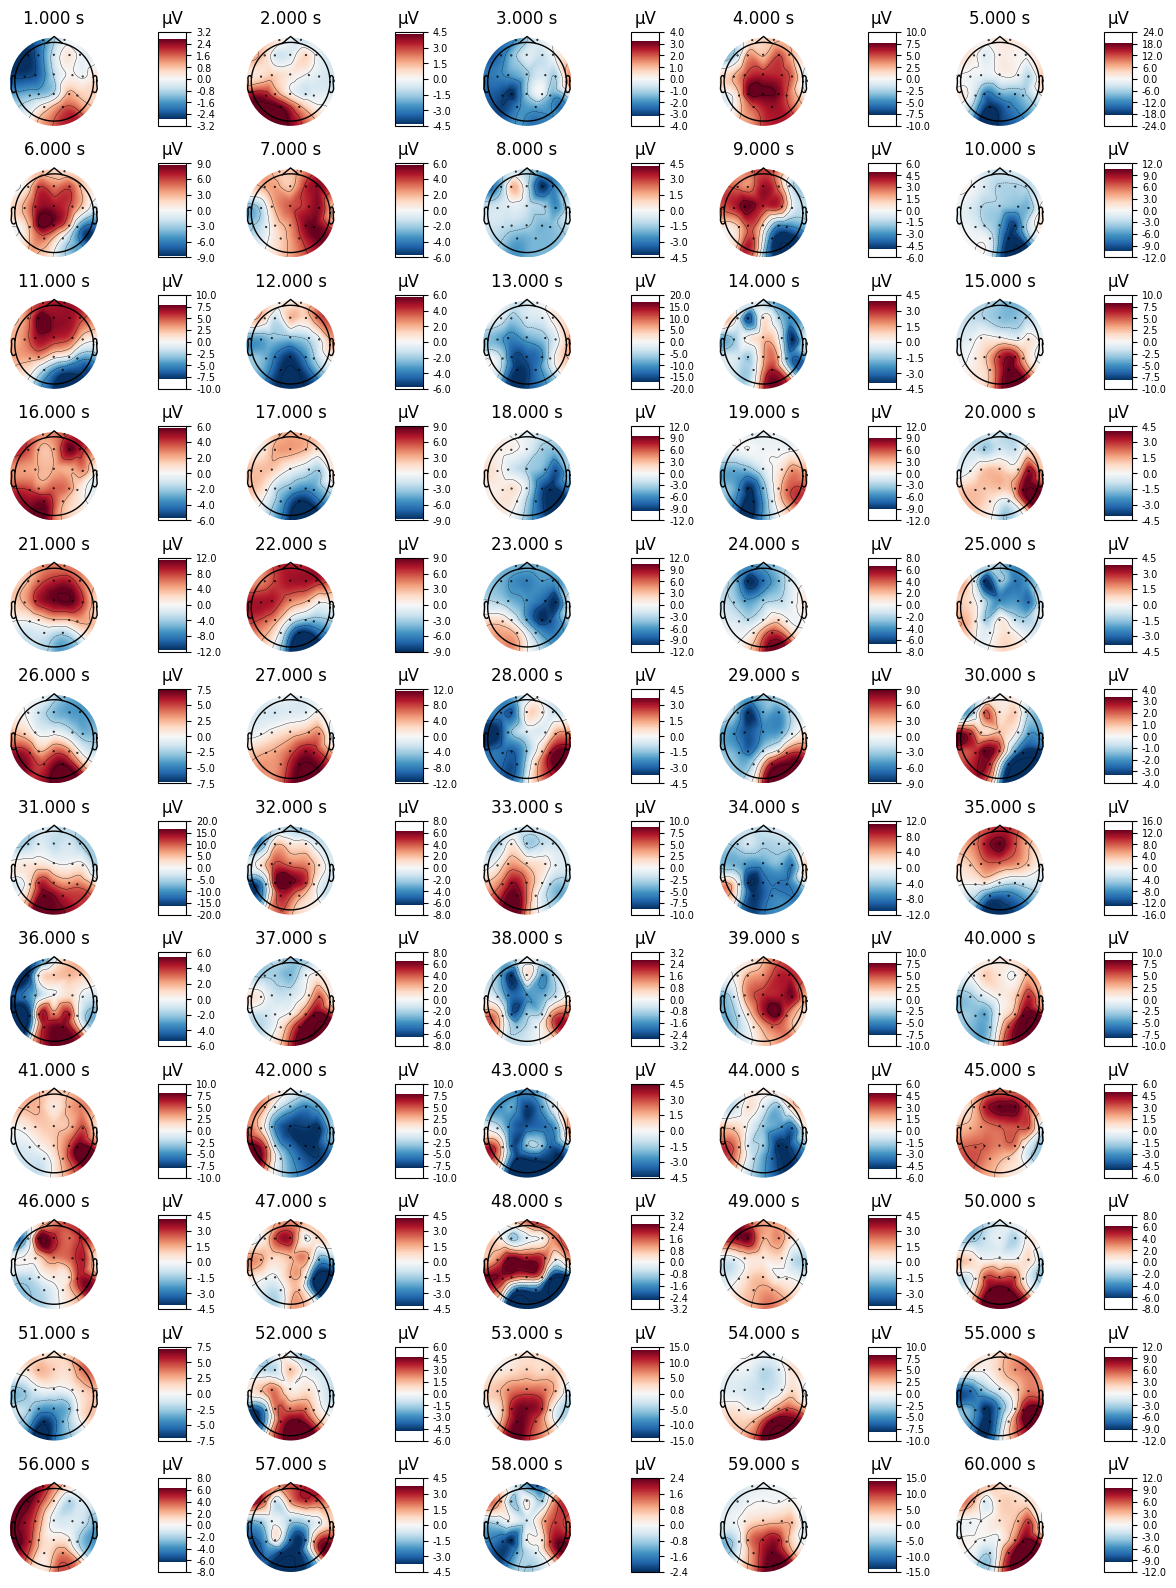

In [ ]:
# Function to help print out topomaps in an orderly manner
def topomap_alpha_band_plot(raw, duration):

    # Filter the raw to have alpha band range
    filtered = raw.copy().filter(8, 12, l_trans_bandwidth=1, h_trans_bandwidth=1)

    # Now create epochs from the filtered raw data (alpha band or 8hz to 12hz range)
    events = mne.make_fixed_length_events(filtered, duration=duration)  # Record the length of events (duration taken)
    epochs = mne.Epochs(filtered, events, tmin=0, tmax=60.0, baseline=None) # Find events from 0 to 60 seconds
    
    # Average the epochs to create an evoked object
    evoked = epochs.average()
    
    # Define time points (from 1 to 60 seconds)
    time_points = np.arange(1, 61)

    # Create a grid of subplots (e.g., 12 rows x 5 columns for 60 time points)
    n_rows = 12
    n_cols = 10

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 20), gridspec_kw={'width_ratios': [6, 1] * (n_cols//2)})

    # Loop through time points and plot topomap in each subplot
    r = 0
    while r < n_rows:
        c = 0
        while c < n_cols:
            # Math conversion of r and c to get indexes of time from 0 to 59
            time = time_points[(n_cols//2)*r+(c//2)]
            # Plot the topomap along with the color bar along the next 2 columns in the given row
            evoked.plot_topomap(times=[time], axes=axs[r, c:c+2], show=False, colorbar=True)
            c+=2
        r+=1

    plt.subplots_adjust(hspace=0.4)  # Add space between rows (hspace)
    plt.show() # show plot


topomap_alpha_band_plot(subject6_background, 180) # Print Results for subject 6 background

The plot above is over subject 6 background and the main there here to note is there there is alot blue activation in comparison to the red and that might be because of the interval which we are recording these values (every second could be on the lower half of the signal most of the time). The highest amplitude value found here was 18uV. & the average amplitude value out of these is around 9uV (highend).

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


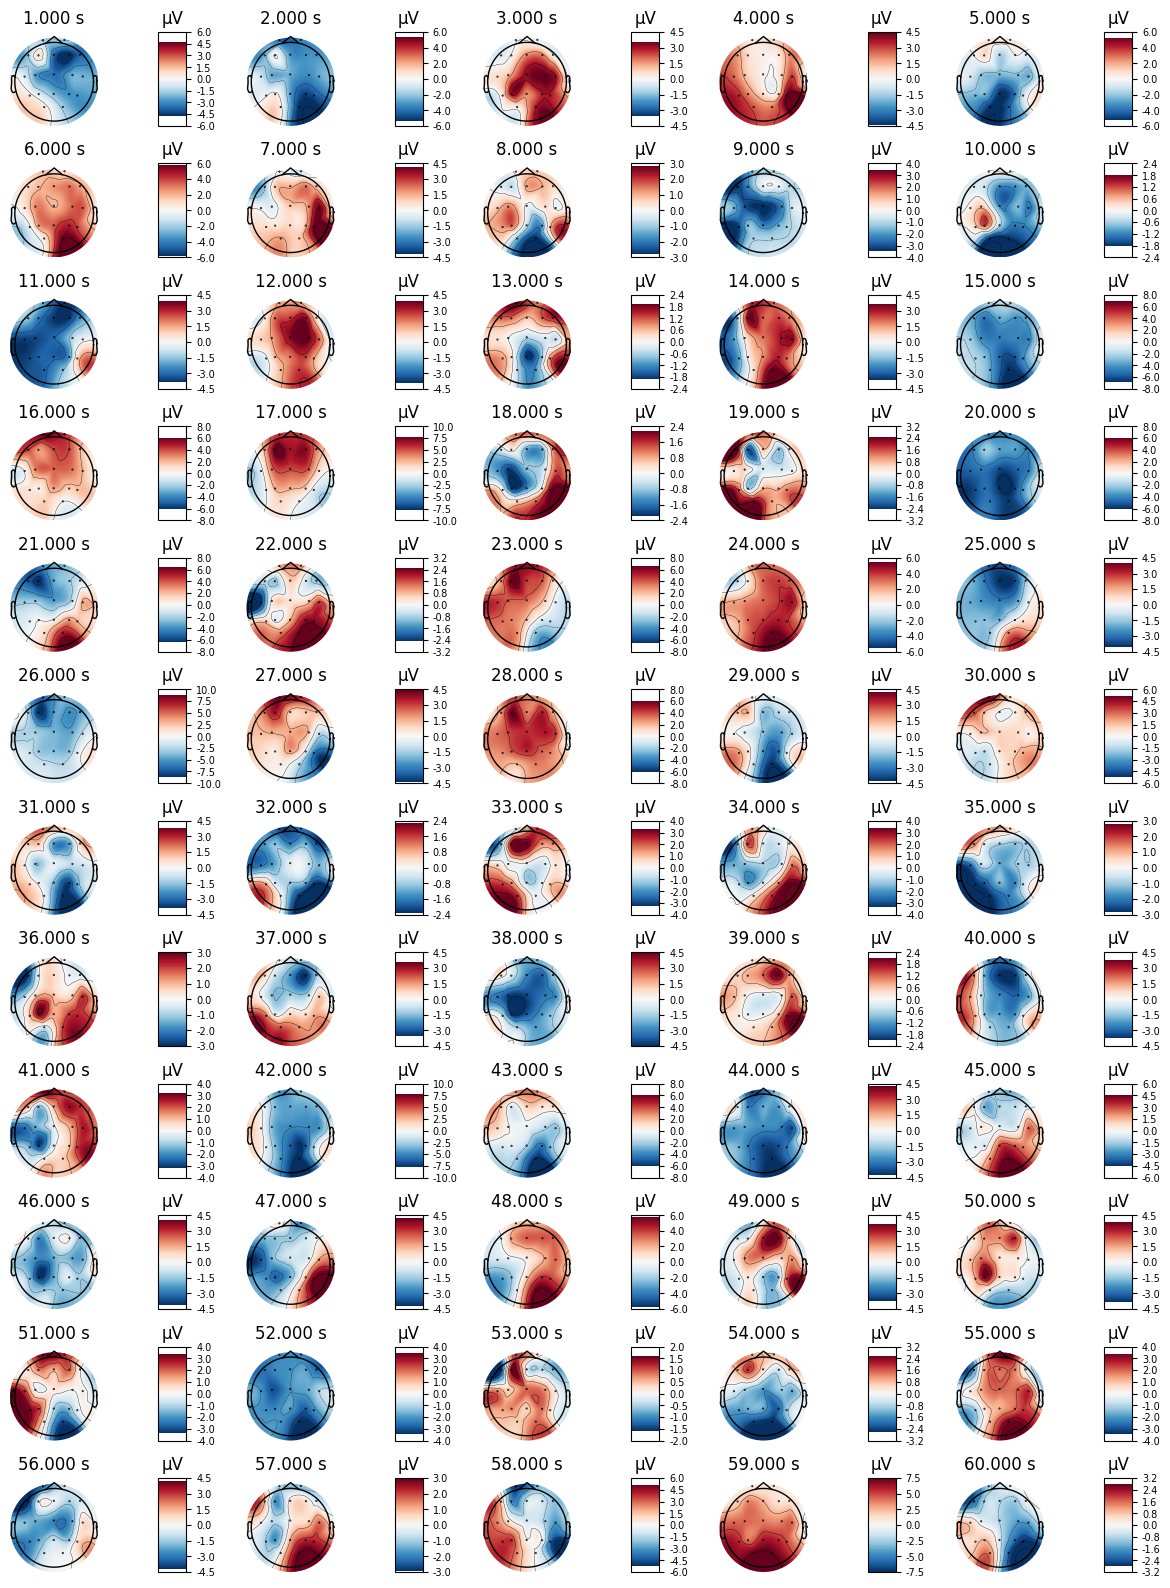

In [ ]:
topomap_alpha_band_plot(subject6_task, 60) # Print Results for subject 6 task

The plot above is over subject 6 task and the highest amplitude present is around 7uV. This is less than half what was the highest amplitude found in the background for subject 6. This tells us that in the alpha band frequency range that the subject is less relaxed and therefore these types of frequencies are not as present. Out of all these plots it seems like the most extreme amplitude areas were located in the back of the head near the occipital lobe, probably because subject 6 was more relaxed by looking at the task in comparison to thinking about the task.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


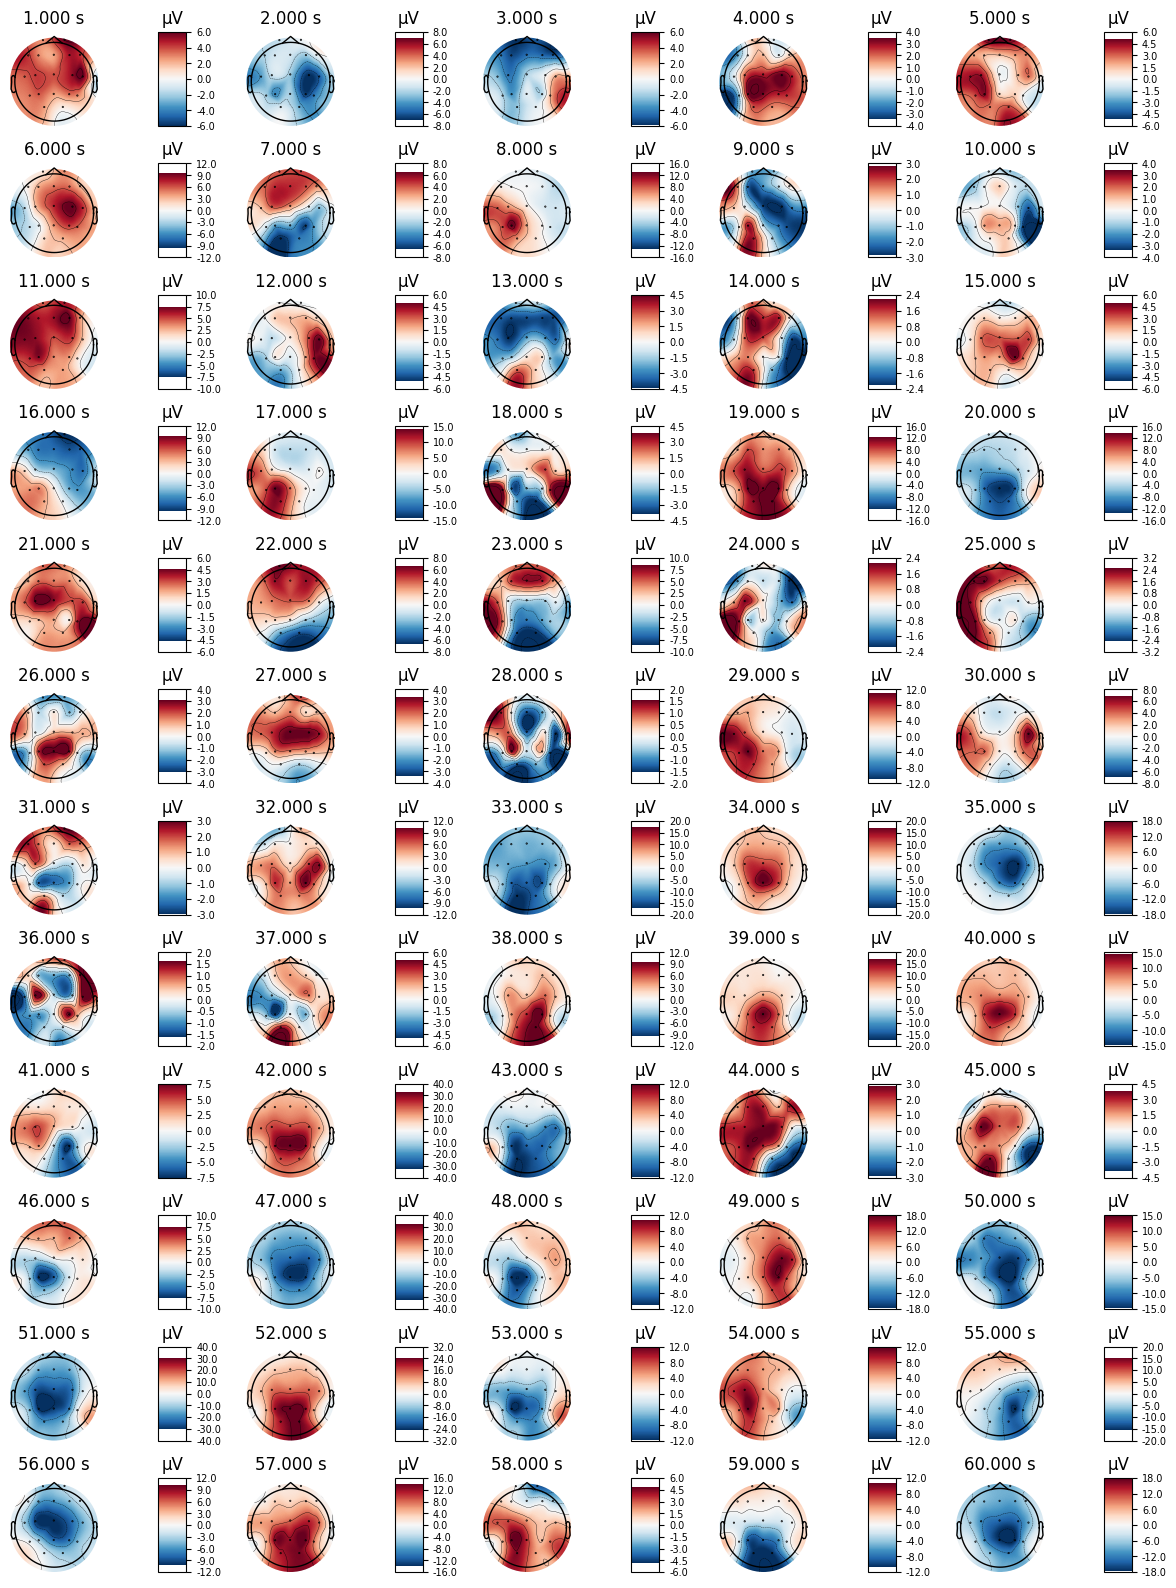

In [ ]:
topomap_alpha_band_plot(subject7_background, 180) # Print Results for subject 7 background

The plot above is over subject 7 background and the highest amplitude value is around 33uV given 47 seconds. This is almost 2x larger than the largest value found on the subject 6 background topomap plot. Another thing to mention is that the density of the amplitudes seem to be evenly distributed amongst the brain. So for example the topomap at 36 seconds has a bunch of high amplitudes at different sections of the brain, this can be found in the 44 second topomap and others to, the point is that it's more prevalent that this is the case for subject 7 background over subject 6 background.

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 1651 samples (3.302 s)

Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


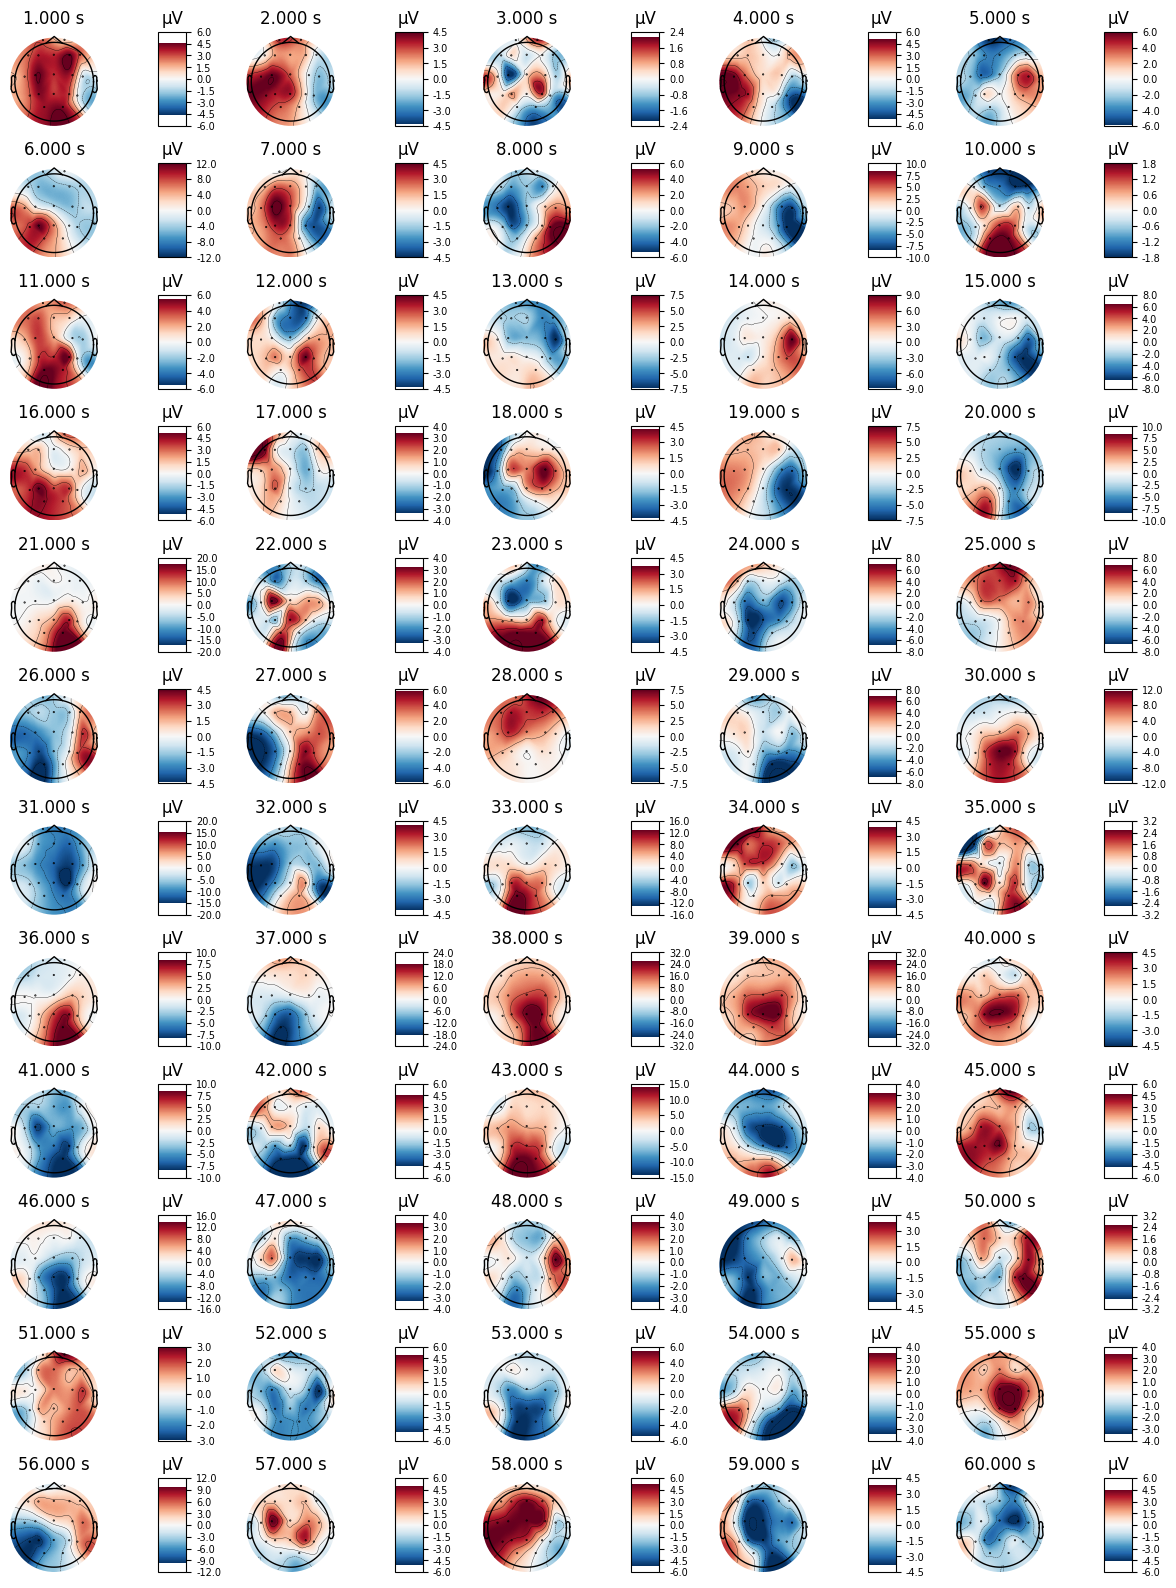

In [ ]:
topomap_alpha_band_plot(subject7_task, 60) # Print Results for subject 7 task

The plot above is over subject 7 task and the highest amplitude found was around 26uV, which is a little less than what we found in the subject 7 background topomap plot. That amplitude is also 4x higher than the highest amplitude found in the subject 6 task topomap plot. It also seems that alot of the dense amplitude changes are happening in the center of the head where the motor cortex is located along with very minimal amplitude happening in the frontal lobe on average. 

### Overall Thoughts and conclusions

Sense the alpha band has the seen trait of being corralated with relaxation and passive attention. We can tell fron the high amplitudes observed that subject 7 was way more relaxed in comparison to subject 6 because subject 7 had a way higher amplitude in this range. Another interesting thing to mention is that subject 7 didn't have much amplitude near the frontal lobe compared to other parts of the brain, while subject 6 had a higher amplitude in the frontal lobe compared to other parts of the brain. This could mean that Other parts of the brain were more relaxed in subjects 7's case, but the front lobe was interestingly enough the more relaxed region in subject 6's case. However subject 6 could have been panic or thinking in a way which required other regions of the brain to not be as relaxed (other frequence band types). However like previously said, subject 7 was overall way more relaxed than subject 6.